In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('TV_Shows.csv')

In [3]:
df.head(10)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
5,5,The Office,2005,16+,8.9,81%,1,0,0,0,1
6,6,Black Mirror,2011,18+,8.8,83%,1,0,0,0,1
7,7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
8,8,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0,1
9,9,Avatar: The Last Airbender,2005,7+,9.2,NaN,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1010 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [5]:
##Convert Rotten Tomatoes (% → numeric)
df['Rotten Tomatoes'] = pd.to_numeric(
    df['Rotten Tomatoes'].astype(str).str.replace('%', ''),
    errors='coerce'
)

In [6]:
##Handle Age Column 
df['Age'] = df['Age'].replace('all', '0+')
df['Age'] = df['Age'].str.replace('+', '', regex=False)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [7]:
##Filling missing values
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['IMDb'].fillna(df['IMDb'].mean(), inplace=True)
df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].median(), inplace=True)


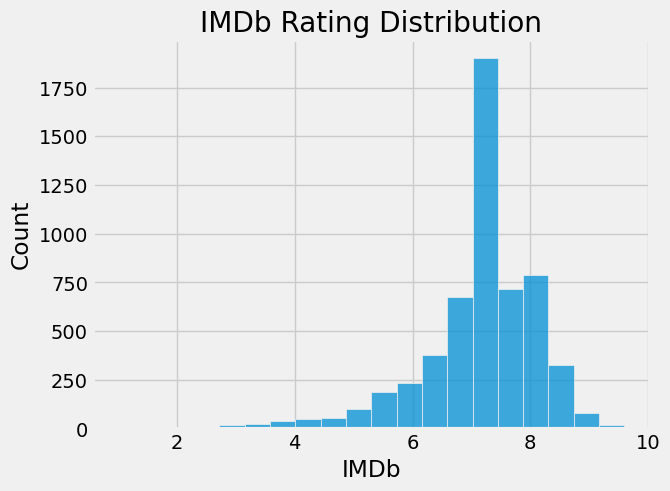

In [35]:
##IMDb Distribution
plt.figure()
sns.histplot(df['IMDb'], bins=20)
plt.title("IMDb Rating Distribution")
plt.show()


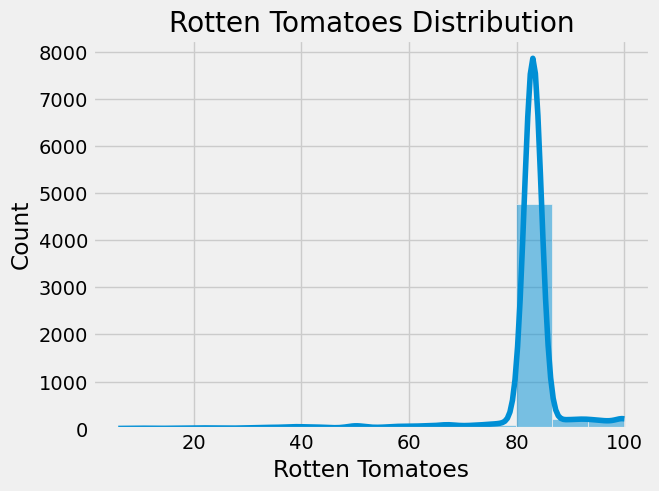

In [33]:
##Rotten Tomatoes Distribution
plt.figure()
sns.histplot(df['Rotten Tomatoes'], kde=True)
plt.title("Rotten Tomatoes Distribution")
plt.show()


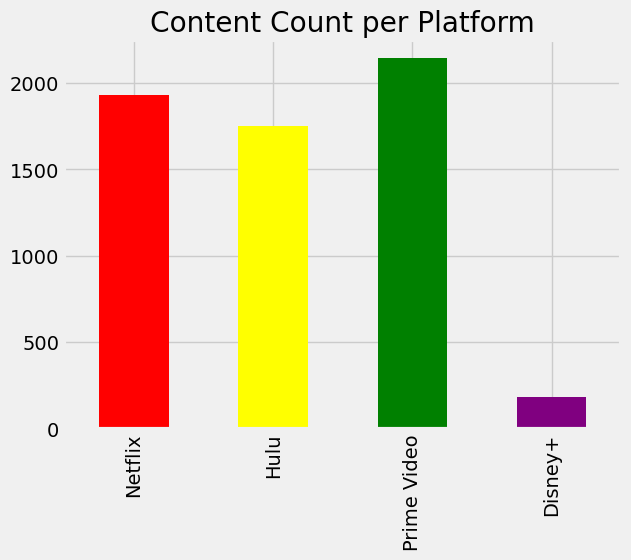

In [28]:
##Platform Availability Count
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
df[platforms].sum().plot(kind='bar', color=['Red','Yellow','Green','Purple'])
plt.title("Content Count per Platform")
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode Categorical Columns

In [11]:
##Encode Title (optional, not very useful for ML)
df.drop(['Title'], axis=1, inplace=True)


In [13]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


Feature Selection for KNN

In [14]:
##We will predict platform availability (Netflix) as the target
X = df[['Year', 'Age', 'IMDb', 'Rotten Tomatoes']]
y = df['Netflix']


Feature Scaling

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# Apply KNN Algorithm

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

# Prediction

In [20]:
y_pred = knn.predict(X_test)


# Accuracy

In [21]:
accuracy_score(y_test, y_pred)


0.6562778272484416

<Axes: >

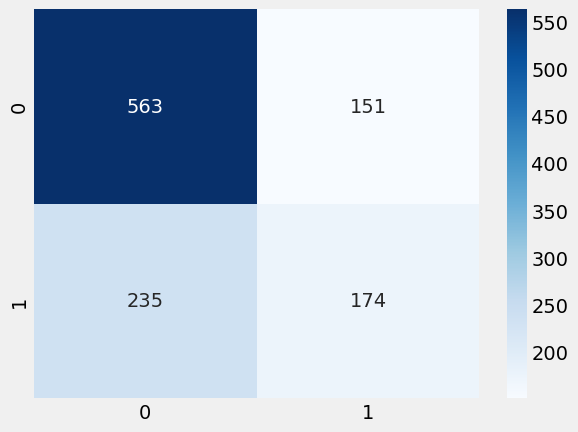

In [26]:
##Confusion Matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')

In [23]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74       714
           1       0.54      0.43      0.47       409

    accuracy                           0.66      1123
   macro avg       0.62      0.61      0.61      1123
weighted avg       0.64      0.66      0.65      1123



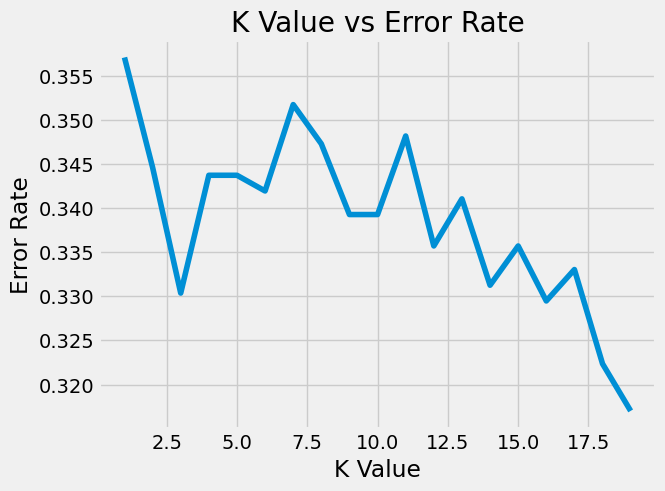

In [27]:
error_rate = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure()
plt.plot(range(1, 20), error_rate)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("K Value vs Error Rate")
plt.show()
